<a href="https://colab.research.google.com/github/ju3tin/123a/blob/master/Wav2Lip_TenDeepfake_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

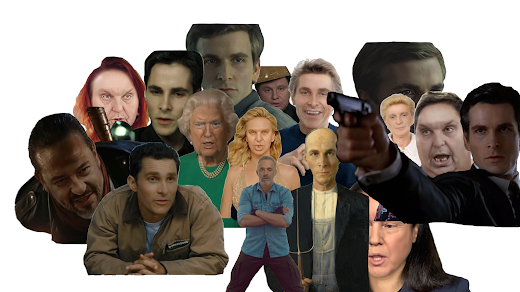

# **Welcome to Wav2Lip colab mod by Ten Deepfake**

# **There is no need for colab pro to use it.**
[Youtube](https://www.youtube.com/user/zabique) [Discord](https://discord.gg/dhfTaR7W88) [E-mail](mailto:tendeepfake@gmail.com
)



---



# **Get the code and models**

In [1]:
#@title <h1>Install Wav2Lip</h1>
#@markdown * Install dependencies
#@markdown * Download models
!rm -rf /content/sample_data
!mkdir /content/sample_data

!git clone https://github.com/zabique/Wav2Lip

#download the pretrained model
!wget 'https://iiitaphyd-my.sharepoint.com/personal/radrabha_m_research_iiit_ac_in/_layouts/15/download.aspx?share=EdjI7bZlgApMqsVoEUUXpLsBxqXbn5z8VTmoxp55YNDcIA' -O '/content/Wav2Lip/checkpoints/wav2lip_gan.pth'
!wget 'https://iiitaphyd-my.sharepoint.com/:u:/g/personal/radrabha_m_research_iiit_ac_in/Eb3LEzbfuKlJiR600lQWRxgBIY27JZg80f7V9jtMfbNDaQ?e=TBFBVW' -O '/content/Wav2Lip/checkpoints/wav2lip.pth'
!pip install https://raw.githubusercontent.com/AwaleSajil/ghc/master/ghc-1.0-py3-none-any.whl

# !pip uninstall tensorflow tensorflow-gpu
!cd Wav2Lip && pip install -r requirements.txt

#download pretrained model for face detection
!wget "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" -O "/content/Wav2Lip/face_detection/detection/sfd/s3fd.pth"

!pip install -q youtube-dl
!pip install ffmpeg-python
from IPython.display import clear_output 
clear_output()
print("\nDone")


Done




---



# **Quick guide**
1. Create video file input_video.mp4
2. Create audio file input_audio.wav
3. Both files have to be exact same length
4. Target face in the input_video.mp4, must be in ALL videoframes (So no black or blurry frames etc)


# **Now lets try!**



---



In [2]:
#@title 1.Upload input_video.mp4 & input_audio.wav files
%cd sample_data/
from google.colab import files
uploaded = files.upload()
%cd ..

/content/sample_data


Saving 0001-0240.mp4 to 0001-0240.mp4
Saving 123.mp3 to 123.mp3
/content


In [5]:
#@title 2.Create Wav2Lip video (using wav2lip_gan.pth) GAN
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/0001-0240.mp4" --audio "/content/sample_data/123.mp3"

Using cuda for inference.
Reading video frames...
Number of frames available for inference: 240
Extracting raw audio...
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-lib

In [6]:
#@title 3.Play result video -  50% scaling
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [7]:
#@title 4.Download Result.mp4 to your computer
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title 5. Delete old result files
%rm /content/sample_data/*
%rm /content/Wav2Lip/results/*
from IPython.display import clear_output 
clear_output()
print("\nDone! now press X")



---



In [ ]:
#@title 1-4. Batch processing - Upload -> process -> download -> play result
%cd sample_data/
%rm input_audio.wav
%rm input_video.mp4
from google.colab import files
uploaded = files.upload()
%cd ..
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav"
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4') 
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")



---



# **Variations to try**


In [ ]:
#@title 2.Use resize_factor to reduce the video resolution, as there is a change you might get better results for lower resolution videos. Why? Because the model was trained on low resolution faces.
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav" --resize_factor 2

In [ ]:
#@title 3.Use more padding to include the chin region (u can manually edit pads dimensions viewing and changing the code)
!cd Wav2Lip && python inference.py --checkpoint_path checkpoints/wav2lip_gan.pth --face "/content/sample_data/input_video.mp4" --audio "/content/sample_data/input_audio.wav" --pads 0 20 0 0

In [ ]:
#@title 4.Play result video -  50% scaling
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/Wav2Lip/results/result_voice.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

In [ ]:
#@title 5.Download Result.mp4 to your computer
from google.colab import files
files.download('/content/Wav2Lip/results/result_voice.mp4') 
